# Weather's Effect on Solar Generation

## 1. Introduction
As a solar salesman and business owner, I have domain experience in the renewable energy space. As a surprisingly unregulated market, research-driven information is not always presented to prospective customers, often falling below closing a sale on a representative's priority list. Consumers are often misinformed. A classic example is the oft asked question, "will the cloudy weather impact how much the solar panels will produce?" This question is usually met with techno-babble and pseudo-science explaining why one simply shouldn't worry about it. I say let's answer the question.



## 2. Hypothesis
Ho: There is no significant difference between the median solar generation output on clear days versus that of cloudy days.

Ha: There is a significant difference between the median solar generation output on clear days versus that of cloudy days.

## 3. Data
The data comes from [kaggle](https://www.kaggle.com/nicholasjhana/energy-consumption-generation-prices-and-weather) split into two datasets. The first contains 35,064 observations. These observations include a column of instantaeously captured production levels of solar systems for each hour for four years, aggregated across Spain. The second database includes weather information at the same resolution for each of the five major cities in Spain. I intend to average the cities' weather data to represent the effective weather conditions for all of spain.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
try:
    raw_solar = pd.read_csv('energy_dataset.csv')
    raw_weather = pd.read_csv('weather_features.csv')
except FileNotFoundError as e:
    print(e)
    print('Attempting to read datasets from online csv files on Github')
    raw_solar = pd.read_csv('https://github.com/cobyoram/Thinkful_capstone_1/blob/master/energy_dataset.csv')
    raw_weather = pd.read_csv('https://github.com/cobyoram/Thinkful_capstone_1/blob/master/weather_features.csv')

In [3]:
print(raw_solar.info())
raw_solar.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
time                                           35064 non-null object
generation biomass                             35045 non-null float64
generation fossil brown coal/lignite           35046 non-null float64
generation fossil coal-derived gas             35046 non-null float64
generation fossil gas                          35046 non-null float64
generation fossil hard coal                    35046 non-null float64
generation fossil oil                          35045 non-null float64
generation fossil oil shale                    35046 non-null float64
generation fossil peat                         35046 non-null float64
generation geothermal                          35046 non-null float64
generation hydro pumped storage aggregated     0 non-null float64
generation hydro pumped storage consumption    35045 non-null float64
generation hydro run-of-river and poundage     35045 non

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [4]:
print(raw_weather.info())
raw_weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
dt_iso                 178396 non-null object
city_name              178396 non-null object
temp                   178396 non-null float64
temp_min               178396 non-null float64
temp_max               178396 non-null float64
pressure               178396 non-null int64
humidity               178396 non-null int64
wind_speed             178396 non-null int64
wind_deg               178396 non-null int64
rain_1h                178396 non-null float64
rain_3h                178396 non-null float64
snow_3h                178396 non-null float64
clouds_all             178396 non-null int64
weather_id             178396 non-null int64
weather_main           178396 non-null object
weather_description    178396 non-null object
weather_icon           178396 non-null object
dtypes: float64(6), int64(6), object(5)
memory usage: 23.1+ MB
None


,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


## 4. Methods
For this analysis, I will first aggregate the usable weather data to provide a description of the cloud coverage over Spain at each timestamp. Then I will join solar generation and weather information together to create one table with a generation and cloud coverage measurement for each time. I feel the best approach for separating my data into testable groups will be to use the aggregated cloud coverage data to create categories out of the numeric variable to represent different levels of cloudiness. 

Since I anticipate the distribution of my solar generation to be far from normal, I will use a Kruskal test for multiple independent and identically distributed samples. If I can reject my null hypothesis, I will construct a visual depiction of the spread of data to find which direction the difference takes.

I am making several assumptions on this data. The most important assumption to understand is the assumption that the average weather data between the 5 major cities in Spain accurately represent the average weather data at the site of generation.

In [5]:
# We only want the 'generation solar' from the solar database and 'clouds_all' from the weather database for each city names in 'city_names'
raw_solar = raw_solar.loc[:,['time', 'generation solar']]
raw_weather = raw_weather.loc[:,['dt_iso', 'city_name', 'clouds_all']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 2 columns):
time                35064 non-null object
generation solar    35046 non-null float64
dtypes: float64(1), object(1)
memory usage: 548.0+ KB
None
       generation solar
count      35046.000000
mean        1432.665925
std         1680.119887
min            0.000000
25%           71.000000
50%          616.000000
75%         2578.000000
max         5792.000000


C:\Python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


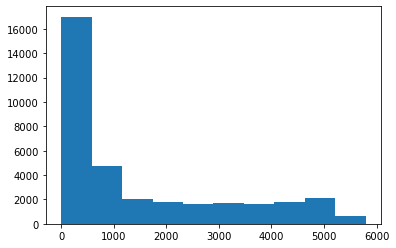

,time,generation solar
0,2015-01-01 00:00:00+01:00,49.0
1,2015-01-01 01:00:00+01:00,50.0
2,2015-01-01 02:00:00+01:00,50.0
3,2015-01-01 03:00:00+01:00,50.0
4,2015-01-01 04:00:00+01:00,42.0


In [6]:
# Lets look at the descriptive info for our solar data
print(raw_solar.info())
print(raw_solar.describe())
plt.hist(raw_solar['generation solar'])
plt.show()
raw_solar.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 3 columns):
dt_iso        178396 non-null object
city_name     178396 non-null object
clouds_all    178396 non-null int64
dtypes: int64(1), object(2)
memory usage: 4.1+ MB
None
          clouds_all
count  178396.000000
mean       25.073292
std        30.774129
min         0.000000
25%         0.000000
50%        20.000000
75%        40.000000
max       100.000000


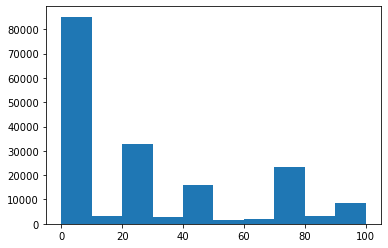

,dt_iso,city_name,clouds_all
0,2015-01-01 00:00:00+01:00,Valencia,0
1,2015-01-01 01:00:00+01:00,Valencia,0
2,2015-01-01 02:00:00+01:00,Valencia,0
3,2015-01-01 03:00:00+01:00,Valencia,0
4,2015-01-01 04:00:00+01:00,Valencia,0


In [7]:
# And the info for our weather data
print(raw_weather.info())
print(raw_weather.describe())
plt.hist(raw_weather['clouds_all'])
plt.show()
raw_weather.head()

In [8]:
# The data is provided in the correct timezone, but we want to centralize the data on the local timezone
# We drop the '+##:##' from each timestamp reading in both datasets 
raw_weather['dt_iso'] = raw_weather['dt_iso'].str.replace('\+[0-9][0-9]:[0-9][0-9]', '', regex=True)
raw_solar['time'] = raw_solar['time'].str.replace('\+[0-9][0-9]:[0-9][0-9]', '', regex=True)

print('weather time range:', raw_weather['dt_iso'].min(), 'to', raw_weather['dt_iso'].max())
print('solar time range:', raw_solar['time'].min(), 'to', raw_solar['time'].max())

weather time range: 2015-01-01 00:00:00 to 2018-12-31 23:00:00
solar time range: 2015-01-01 00:00:00 to 2018-12-31 23:00:00


In [9]:
# Now because we have repeating time values (five city readings for each timestamp),
# we want to get aggregate that data over all of Spain, rather than the 5 major cities.abs
# Let's average the cloud coverage to represent a cloud coverage for the major population
# and, as we assume, production areas
grouped_weather = raw_weather.groupby(by='dt_iso').agg('mean').reset_index()
grouped_weather.head()

,dt_iso,clouds_all
0,2015-01-01 00:00:00,0.0
1,2015-01-01 01:00:00,0.0
2,2015-01-01 02:00:00,0.0
3,2015-01-01 03:00:00,0.0
4,2015-01-01 04:00:00,0.0


In [10]:
# Now we can join our two datasets together on the timestamps to form one dataset that reports solar
# generation level and cloud coverage for all of spain at each hour.

# First we rename the timestamp column in the weather database to make it clear where we are joining
grouped_weather = grouped_weather.rename(columns={'dt_iso':'time'})
print('weather')
print(grouped_weather.head(1))
print('solar')
print(raw_solar.head(1))

weather
                  time  clouds_all
0  2015-01-01 00:00:00         0.0
solar
                  time  generation solar
0  2015-01-01 00:00:00              49.0


In [11]:
# Now we join the data at the time column
solar_weather = raw_solar.set_index('time').join(grouped_weather.set_index('time')).reset_index()
print(solar_weather.info())

#We'll drop the 22 null values in the data
solar_weather.dropna(inplace=True)
solar_weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 3 columns):
time                35064 non-null object
generation solar    35046 non-null float64
clouds_all          35064 non-null float64
dtypes: float64(2), object(1)
memory usage: 821.9+ KB
None


,time,generation solar,clouds_all
0,2015-01-01 00:00:00,49.0,0.0
1,2015-01-01 01:00:00,50.0,0.0
2,2015-01-01 02:00:00,50.0,0.0
3,2015-01-01 03:00:00,50.0,0.0
4,2015-01-01 04:00:00,42.0,0.0


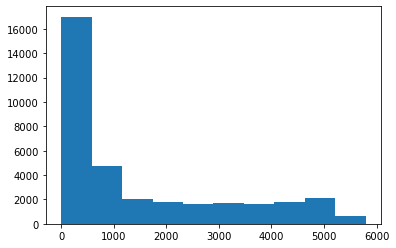

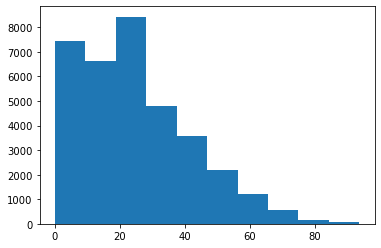

In [14]:
# Now let's look at the distributions of our variables again
plt.hist(solar_weather['generation solar'])
plt.show()
plt.hist(solar_weather['clouds_all'])
plt.show()

In [15]:
# Since time is still technically a string type, it isn't very pretty on a graph, so
# we'll change it to a pd.timestamp object so sns and plt can make sense of it.
solar_weather['time'] = date_time=pd.to_datetime(solar_weather['time'])

# We may want to clarify that this column is a datetime indication, not just time.
# This will free up time as a column name we can use later when we add features for EDA.
# While we are at it, we will rename the other columns to be more descriptive and match formats.
solar_weather = solar_weather.rename(columns={'time': 'datetime',
                                                'generation solar': 'solar_generation',
                                                'clouds_all': 'cloud_coverage'})

solar_weather.head()

,datetime,solar_generation,cloud_coverage
0,2015-01-01 00:00:00,49.0,0.0
1,2015-01-01 01:00:00,50.0,0.0
2,2015-01-01 02:00:00,50.0,0.0
3,2015-01-01 03:00:00,50.0,0.0
4,2015-01-01 04:00:00,42.0,0.0


             datetime  solar_generation  cloud_coverage  hour
0 2015-01-01 00:00:00              49.0             0.0     0
1 2015-01-01 01:00:00              50.0             0.0     1
2 2015-01-01 02:00:00              50.0             0.0     2
3 2015-01-01 03:00:00              50.0             0.0     3
4 2015-01-01 04:00:00              42.0             0.0     4


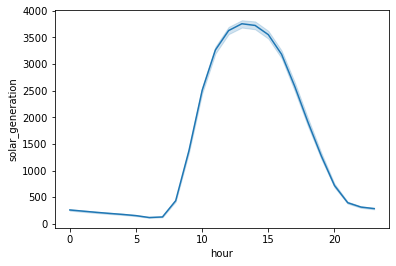

As expected, the generation levels are highest as the sun is most directly above the generating systems, with relatively negligeable production at night.


In [16]:
# Let's do some exploratory data analysis to find out how we want to categorize our data
# Since our generation data could vary by time or by cloud coverage, let's explore those avenues

# We'll start with time. First, let's see how the generation varies over the hours in a day
hour_sw = solar_weather.assign(hour=solar_weather.datetime.dt.hour)
print(hour_sw.head())

# Now we can use sns.lineplot to graph the confidence interval and variation of the data for each hour
sns.lineplot(x='hour', y='solar_generation', data=hour_sw)
plt.show()
print('As expected, the generation levels are highest as the sun is most directly above the generating systems, with relatively negligeable production at night.')

             datetime  solar_generation  cloud_coverage  day
0 2015-01-01 00:00:00              49.0             0.0    1
1 2015-01-01 01:00:00              50.0             0.0    1
2 2015-01-01 02:00:00              50.0             0.0    1
3 2015-01-01 03:00:00              50.0             0.0    1
4 2015-01-01 04:00:00              42.0             0.0    1


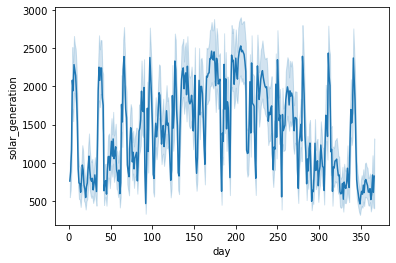

While a trend is evident that the summer months are far more productive than winder, this curve is far less smooth. I wonder what could be affecting that.


In [17]:
# Let's try doing the same thing, but by days in a year
day_sw = solar_weather.assign(day=solar_weather['datetime'].dt.dayofyear)
print(day_sw.head())

# Now we can use sns.lineplot to graph the confidence interval and variation of the data for each day
sns.lineplot(x='day', y='solar_generation', data=day_sw)
plt.show()
print('While a trend is evident that the summer months are far more productive than winder, this curve is far less smooth. I wonder what could be affecting that.')

We seem to almost have some trend on the upper limit of the scatter, but the bottom is all filled in.
We suspect this is because every day has both high and low production because of the nighttime hours.


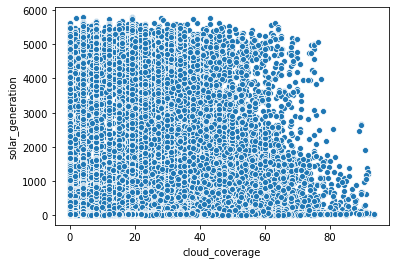

In [18]:
# Let's switch gears and see how the cloud coverage affects our generation
sns.scatterplot(x='cloud_coverage', y='solar_generation', data=solar_weather)
print('We seem to almost have some trend on the upper limit of the scatter, but the bottom is all filled in.')
print('We suspect this is because every day has both high and low production because of the nighttime hours.')

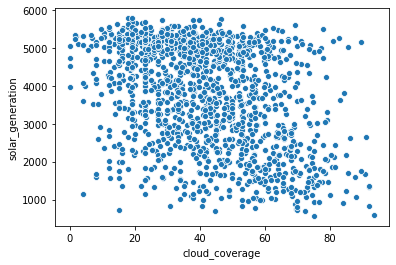

while the correlation of -0.39292003006840215 isn't super high, we can see from the graph that there appears to be some negative correlation between cloud coverage and solar production


In [31]:
# Let's give this same graph a shot using only the peak production measures for each date. 
# This will rid us of nighttime values and allow us to judge if the cloud coverage is affecting peak production.
# First we assign a new column called date to the date
date_sw = solar_weather.assign(date=solar_weather['datetime'].dt.date)

# Next group by the date, taking the max hour generation reading and max cloud coverage for each.
grouped_date_sw = date_sw.groupby(by='date').agg('max').reset_index()
# Graph it
sns.scatterplot(x='cloud_coverage', y='solar_generation', data=grouped_date_sw)
plt.show()

# Calculate the correlation to compare it to the graph
correlation = grouped_date_sw['solar_generation'].corr(grouped_date_sw['cloud_coverage'])
print('while the correlation of {} isn\'t super high, we can see from the graph that there appears to be some negative correlation between cloud coverage and solar production'.format(correlation))

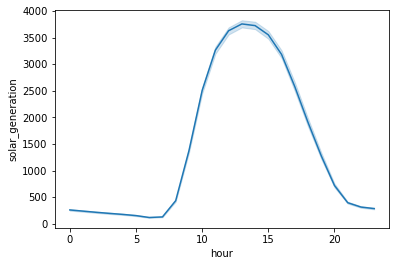

In [32]:
# Since we want information more like what we are seeing in the lower graph, but at a higher resolution, let's simply
# remove the nighttime hours from the dataset, since the production is negligible then and ineffective of our results.abs

# First to remind us where those night hours were:
sns.lineplot(x='hour', y='solar_generation', data=hour_sw)
plt.show()

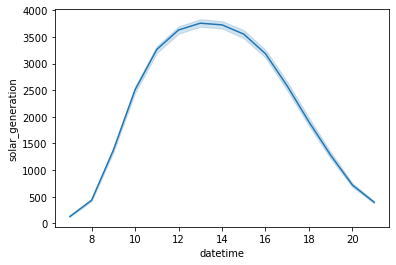

This is much more usable data


In [33]:
# We can clearly see the meaningful data lies between hours 7 and 21
sunrise = 7
sunset = 21

# Let's strip away the unneeded nighttime hours
solar_weather = solar_weather.loc[solar_weather['datetime'].dt.hour.between(sunrise, sunset)]
sns.lineplot(x=solar_weather['datetime'].dt.hour, y='solar_generation', data=solar_weather)
plt.show()
print('This is much more usable data')

In [34]:
# The cloud coverage may be behind what is causing the production curve by day of year to be so sporatically interupted.
# Let's separate the cloud coverage into groups and find out if they have a significant difference.

# First, we'll determine a good grouping number for cloud coverage. We'll use the .describe method to check out distribution.
solar_weather['cloud_coverage'].describe()

count    21899.000000
mean        25.463281
std         17.342341
min          0.000000
25%         12.000000
50%         23.000000
75%         35.690476
max         93.600000
Name: cloud_coverage, dtype: float64

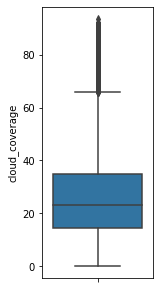

In [46]:
fig = plt.figure(figsize=(2,5))
sns.boxplot(y='cloud_coverage', data=solar_weather)

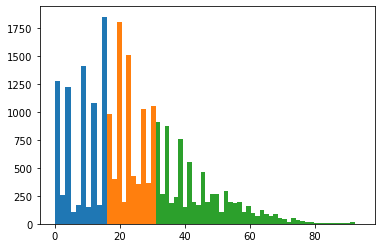

Number of observations in each sample
low: 7682, med: 8104, high: 7588


In [36]:
# Since we saw earlier that our distribution was not normal, let's use the quartile descriptions to categorize our data

# First we set the values for the desired quantiles. We will use .quantile to get the exact number that separates each quantile
low_q = solar_weather['cloud_coverage'].quantile(q=1/3)
med_q = solar_weather['cloud_coverage'].quantile(q=2/3)
high_q = solar_weather['cloud_coverage'].quantile(q=1)

# Then we will create dataframes between each quantile, yielding three equal sized distributions that represent 
# respective cloud coverage
low_coverage = solar_weather.loc[solar_weather['cloud_coverage'].between(0, low_q)]
med_coverage = solar_weather.loc[solar_weather['cloud_coverage'].between(low_q, med_q)]
high_coverage = solar_weather.loc[solar_weather['cloud_coverage'].between(med_q, high_q)]

# Plot the distribution of cloud coverages to see how they are equally grouped each group together with the other groups
plt.hist(low_coverage['cloud_coverage'])
plt.hist(med_coverage['cloud_coverage'])
plt.hist(high_coverage['cloud_coverage'], bins=45)
plt.show()

print('Number of observations in each sample')
print('low: {}, med: {}, high: {}'.format(len(low_coverage), len(med_coverage), len(high_coverage)))

In [37]:
# Now that we have our separate groups, lets see if we can see any difference between their generation distributions

# Since seaborn prefers categories to be in one table, we'll combine our dataframes and assign the respective value to the 'category' column
solar_weather = low_coverage.assign(category='low').append(
                med_coverage.assign(category='medium'), ignore_index=True, verify_integrity=True).append(
                high_coverage.assign(category='high'), ignore_index=True, verify_integrity=True)

# We've added category as a feature to our main solar_weather dataframe
solar_weather.head()

,datetime,solar_generation,cloud_coverage,category
0,2015-01-01 07:00:00,35.0,0.0,low
1,2015-01-01 08:00:00,54.0,0.0,low
2,2015-01-01 09:00:00,743.0,0.0,low
3,2015-01-01 10:00:00,2019.0,0.0,low
4,2015-01-01 11:00:00,3197.0,0.0,low


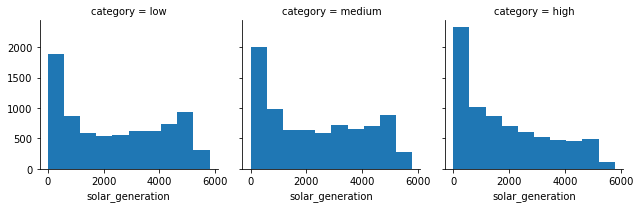

They appear to be similarly distributed. We'll have to rely on a statistical test to determine if there is a difference


In [38]:
# Let's see how each category's distributions of solar generation compare
g = sns.FacetGrid(solar_weather, col='category')
g.map(plt.hist, 'solar_generation')
plt.show()
print('They appear to be similarly distributed. We\'ll have to rely on a statistical test to determine if there is a difference')

In [39]:
# Given that we have more than two independent and identically distributed samples with non-normal distribution, we are going to use a kruskal test
print(stats.kruskal(low_coverage['solar_generation'], med_coverage['solar_generation'], high_coverage['solar_generation']))

print('Given a p-value below .05, we can reject the null hypothesis that the distributions are the same between these three categories')

KruskalResult(statistic=394.5341610406183, pvalue=2.128116842535933e-86)
Given a p-value below .05, we can reject the null hypothesis that the distributions are the same between these three categories


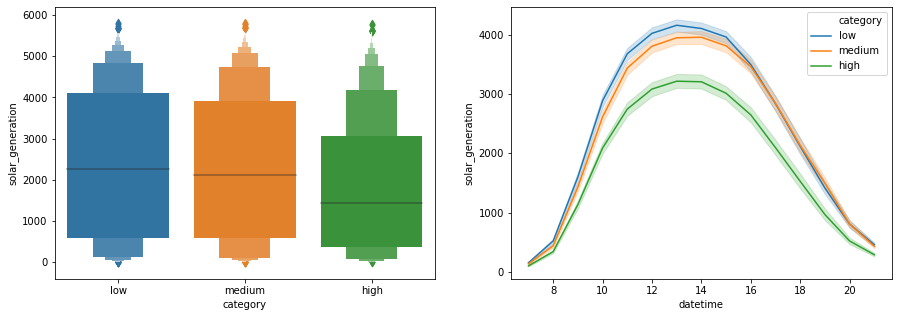

As we can see, the central tendencies of the solar generation distributions lessen as cloud coverage is increased
Difference in medians are:
low - med = 147.0
med - high = 674.5
low - high = 821.5
The drop in median production from low coverage to high coverage is about 36%


In [40]:
# To see how the medians of these categories compare to each other, we can look at a boxenplot
fig, ax = plt.subplots(1,2, figsize=(15,5))

#Plot the medians next to each other
sns.boxenplot(x='category', y='solar_generation', data=solar_weather, ax=ax[0])

# Plot the means and std next to each other
sns.lineplot(x=solar_weather['datetime'].dt.hour, y='solar_generation', hue='category', data=solar_weather, ax=ax[1])
plt.show()


print('As we can see, the central tendencies of the solar generation distributions lessen as cloud coverage is increased')
print('Difference in medians are:')
print('low - med =', low_coverage['solar_generation'].median() - med_coverage['solar_generation'].median())
print('med - high =', med_coverage['solar_generation'].median() - high_coverage['solar_generation'].median())
print('low - high =', low_coverage['solar_generation'].median() - high_coverage['solar_generation'].median())


# Calculate the percentage drop in the median production from low coverage to high coverage
median_difference = low_coverage['solar_generation'].median() - high_coverage['solar_generation'].median()
print('The drop in median production from low coverage to high coverage is about {}%'.format(int(median_difference / low_coverage['solar_generation'].median() * 100)))

## 5. Results
Based on the results of the kruskal test with a p-value lower than .01 and visual inspection, I reject the null hypothesis that there is no significant difference between the median solar generation output on clear days versus that of cloudy days.


The difference between the medians of observed low coverage and high coverage generation is about 36%

You can statistially rely on cloud coverage negatively affecting a system's production.

## 6. Discussion and Recommendation
Solar is still a pretty hot topic for homeowners and energy production companies around the globe. Being aware of how the weather can affect your production over time is an important factor to remember. These results could reasonably be transferred to other locations at the same latitude as Spain, which includes a lot of the USA. As a next step in this process, I would examine how geolocation has an effect on solar production, then build a model to predict future solar generation given historical generation, location, and weather information. This would allow consumers and production companies to accurately plan for their desired generation, and not waste money on system redesigns and addons down the road.